In [ ]:
def laxtrakr_x(file_path,threshold,show_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    
    cut=threshold
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    dataset =df_clean[["x_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg = dataset['x_axis'].rolling(int(hrw*fs)).mean() #Calculate moving average
    #Impute where moving average function returns NaN, which is the beginning of the signal where x hrw

    avg_hr = (np.mean(dataset.x_axis))

    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

    mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically

    dataset['rep_rollingmean'] = mov_avg #Append the moving average to the dataframe

    #Mark regions of interest
    window = []
    peaklist = []
    listpos = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.x_axis:
        rollingmean = dataset.rep_rollingmean[listpos] #Get local mean
        if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
            listpos += 1
        elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
            window.append(datapoint)
            listpos += 1
        else: #If signal drops below local mean -> determine highest point
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
            peaklist.append(beatposition) #Add detected peak to list
            window = [] #Clear marked ROI
            listpos += 1

    ybeat = [dataset.x_axis[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
    
    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(peaklist))
        plt.plot(dataset.x_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(mov_avg, color ='green') #Plot moving average
        plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut, color = 'r', linestyle = '-')
        plt.show()

    d={'time':peaklist,'rep_peak':ybeat}
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df['rep_threshold'] = np.where(df['rep_peak']>cut, 1, 0)
    
    reps= sum(df['rep_threshold'])
    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps: "+ str(reps) + " Threshold Number: " + str(threshold)
    
    return(output_text);

In [22]:
def laxtrakr_z(file_path,threshold,show_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    
    cut=threshold
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    dataset =df_clean[["z_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg = dataset['z_axis'].rolling(int(hrw*fs)).mean() #Calculate moving average
    #Impute where moving average function returns NaN, which is the beginning of the signal where x hrw

    avg_hr = (np.mean(dataset.z_axis))

    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

    mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically

    dataset['rep_rollingmean'] = mov_avg #Append the moving average to the dataframe

    #Mark regions of interest
    window = []
    peaklist = []
    listpos = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.z_axis:
        rollingmean = dataset.rep_rollingmean[listpos] #Get local mean
        if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
            listpos += 1
        elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
            window.append(datapoint)
            listpos += 1
        else: #If signal drops below local mean -> determine highest point
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
            peaklist.append(beatposition) #Add detected peak to list
            window = [] #Clear marked ROI
            listpos += 1

    ybeat = [dataset.z_axis[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes

    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(peaklist))
        plt.plot(dataset.z_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(mov_avg, color ='green') #Plot moving average
        plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut, color = 'r', linestyle = '-')
        plt.show()

    d={'time':peaklist,'rep_peak':ybeat}
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df['rep_threshold'] = np.where(df['rep_peak']>cut, 1, 0)

    reps= sum(df['rep_threshold'])
    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps: "+ str(reps) + " Threshold Number: " + str(threshold)

    return(output_text);

/tmp/ipykernel_9589/1247184588.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe


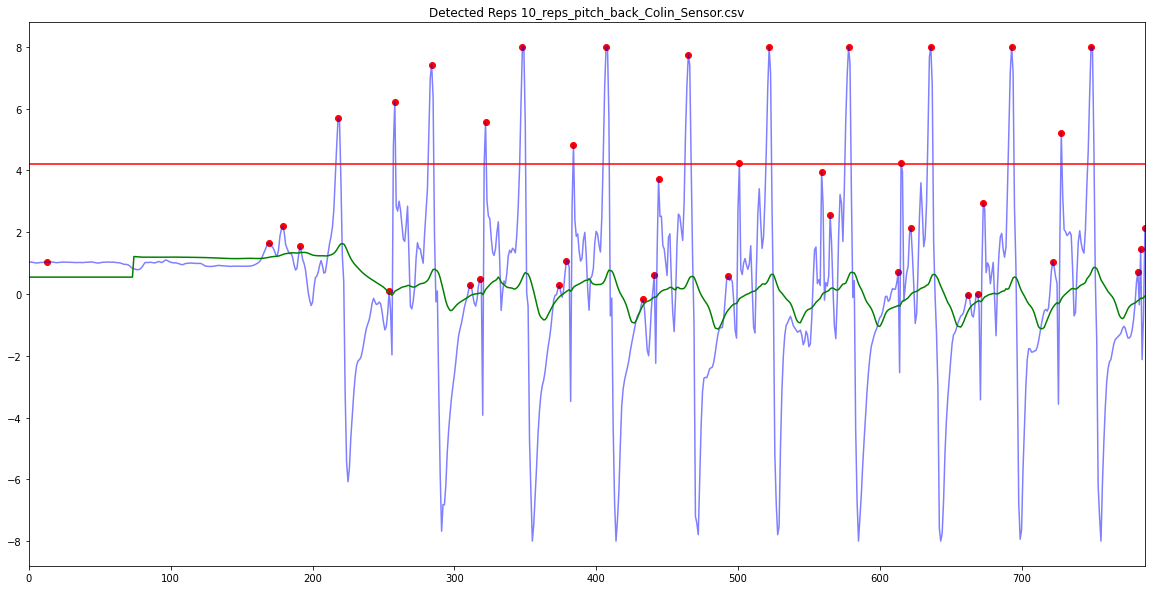

1. File Name: 10_reps_pitch_back_Colin_Sensor.csv Number of Reps: 16 Threshold Number: 4.2


In [19]:
print("1. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10_reps_pitch_back_Colin_Sensor.csv',4.2,'y'))

In [27]:
print("1. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10_reps_pitch_back_Colin_Sensor.csv',4.5,'n'))
print("2. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10_short_stroke_Colins Sensor.csv',4.5,'n'))
print("3. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv',4.5,'n'))
print("4. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/12_short_stroke_Colins_Sensor.csv',4.5,'n'))
print("5. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/20_quick_stick_Colins_Sensor.csv',4.5,'n'))
print("6. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/25_mixed_Colins_Sensor.csv',4.5,'n'))
print("7. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/25L_25R_25Split_25Throw_split_catch_Colins_Sensor.csv',4.5,'n'))
print("8. "+laxtrakr_z(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/Random_Quicksticking_Colins_Sensor.csv',4.5,'n'))

/tmp/ipykernel_9589/1117302790.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe


1. File Name: 10_reps_pitch_back_Colin_Sensor.csv Number of Reps: 10 Threshold Number: 4.5
2. File Name: 10_short_stroke_Colins Sensor.csv Number of Reps: 9 Threshold Number: 4.5
3. File Name: 10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv Number of Reps: 30 Threshold Number: 4.5
4. File Name: 12_short_stroke_Colins_Sensor.csv Number of Reps: 11 Threshold Number: 4.5
5. File Name: 20_quick_stick_Colins_Sensor.csv Number of Reps: 20 Threshold Number: 4.5
6. File Name: 25_mixed_Colins_Sensor.csv Number of Reps: 12 Threshold Number: 4.5
7. File Name: 25L_25R_25Split_25Throw_split_catch_Colins_Sensor.csv Number of Reps: 100 Threshold Number: 4.5
8. File Name: Random_Quicksticking_Colins_Sensor.csv Number of Reps: 33 Threshold Number: 4.5


Going to now need to combine teh z / x axis to get output

In [10]:
pip install math

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Note: you may need to restart the kernel to use updated packages.


In [95]:
def laxtrakr_x(file_path,threshold,show_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    
    cut=threshold
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    source_dataset =df_clean[["x_axis","z_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg_x = source_dataset['x_axis'].rolling(int(hrw*fs)).mean()
    mov_avg_z = source_dataset['z_axis'].rolling(int(hrw*fs)).mean()

    avg_rep_x = (np.mean(source_dataset.x_axis))
    avg_rep_z = (np.mean(source_dataset.z_axis))

    mov_avg_x = [avg_rep_x if math.isnan(x) else x for x in mov_avg_x]
    mov_avg_z = [avg_rep_z if math.isnan(z) else z for z in mov_avg_z]

    mov_avg_x = [x*1.2 for x in mov_avg_x]
    mov_avg_z = [z*1.2 for z in mov_avg_z]

    dataset = source_dataset.copy()
    dataset.loc[:,'rep_rollingmean_x'] = mov_avg_x
    dataset.loc[:,'rep_rollingmean_z'] = mov_avg_z

    #Mark regions of interest
    window_x = []
    peaklist_x = []
    listpos_x = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.x_axis:
        rollingmean_x = dataset.rep_rollingmean_x[listpos_x] #Get local mean
        if (datapoint < rollingmean_x) and (len(window_x) < 1): #If no detectable R-complex activity -> do nothing
            listpos_x += 1
        elif (datapoint > rollingmean_x): #If signal comes above local mean, mark ROI
            window_x.append(datapoint)
            listpos_x += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_x = max(window_x)
            beatposition_x = listpos_x - len(window_x) + (window_x.index(max(window_x))) #Notate the position of the point on the X-axis
            peaklist_x.append(beatposition_x) #Add detected peak to list
            window_x = [] #Clear marked ROI
            listpos_x += 1

    ybeat_x = [dataset.x_axis[x] for x in peaklist_x] #Get the y-value of all peaks for plotting purposes
    
    window_z = []
    peaklist_z = []
    listpos_z = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.z_axis:
        rollingmean_z = dataset.rep_rollingmean_z[listpos_z] #Get local mean
        if (datapoint < rollingmean_z) and (len(window_z) < 1): #If no detectable R-complex activity -> do nothing
            listpos_z += 1
        elif (datapoint > rollingmean_z): #If signal comes above local mean, mark ROI
            window_z.append(datapoint)
            listpos_z += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_z = max(window_z)
            beatposition_z = listpos_z - len(window_z) + (window_z.index(max(window_z))) #Notate the position of the point on the X-axis
            peaklist_z.append(beatposition_z) #Add detected peak to list
            window_z = [] #Clear marked ROI
            listpos_z += 1

    ybeat_z = [dataset.z_axis[x] for x in peaklist_z]

    full_times = ybeat_x + ybeat_z
    full_points = peaklist_x + peaklist_z

    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(full_points))
        plt.plot(dataset.x_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(dataset.z_axis, alpha=0.5, color='black') #Plot semi-transparent HR
        plt.plot(mov_avg_x, color ='green') #Plot moving average
        plt.plot(mov_avg_z, color ='orange') #Plot moving average
        plt.scatter(full_points, full_times, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut, color = 'r', linestyle = '-')
        plt.show()

    d={'time':peaklist_x,'rep_peak':ybeat_x}
    x_data={'time':peaklist_x,'rep_peak':ybeat_x,'axis':'x'}
    z_data={'time':peaklist_z,'rep_peak':ybeat_z,'axis':'y'}
    df_x = pd.DataFrame(x_data, columns=['time','rep_peak','axis'])
    df_z = pd.DataFrame(z_data, columns=['time','rep_peak','axis'])
    df_full = pd.concat([df_x, df_z])
    print(df_full)
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df.loc[:, 'rep_threshold'] = np.where(df['rep_peak']>cut, 1, 0)
    
    reps= sum(df['rep_threshold'])
    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps: "+ str(reps) + " Threshold Number: " + str(threshold)
    
    return(output_text);

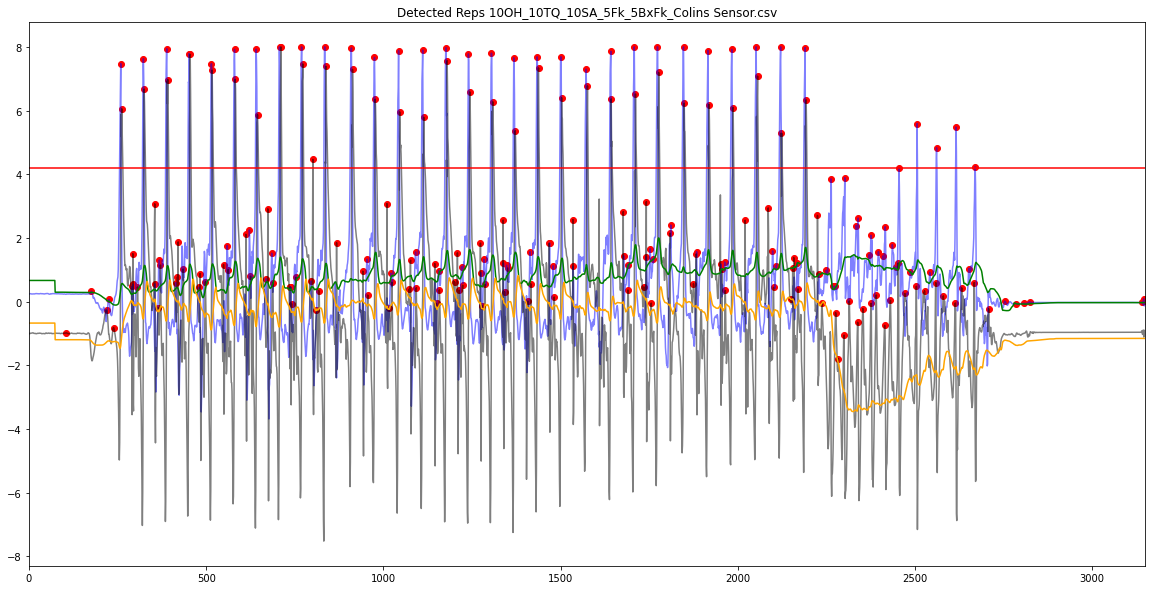

     time  rep_peak axis
0     176     0.329    x
1     226     0.068    x
2     259     7.477    x
3     291     0.479    x
4     294     0.548    x
..    ...       ...  ...
116  2580     0.180    y
117  2614    -0.042    y
118  2632     0.433    y
119  2667     0.594    y
120  2708    -0.221    y

[221 rows x 3 columns]
1. File Name: 10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv Number of Reps: 34 Threshold Number: 4.2


In [96]:
print("1. "+laxtrakr_x(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv',4.2,'y'))

In [148]:
def laxtrakr_dataset(file_path,threshold,show_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    
    cut=threshold
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    source_dataset =df_clean[["x_axis","z_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg_x = source_dataset['x_axis'].rolling(int(hrw*fs)).mean()
    mov_avg_z = source_dataset['z_axis'].rolling(int(hrw*fs)).mean()

    avg_rep_x = (np.mean(source_dataset.x_axis))
    avg_rep_z = (np.mean(source_dataset.z_axis))

    mov_avg_x = [avg_rep_x if math.isnan(x) else x for x in mov_avg_x]
    mov_avg_z = [avg_rep_z if math.isnan(z) else z for z in mov_avg_z]

    mov_avg_x = [x*1.2 for x in mov_avg_x]
    mov_avg_z = [z*1.2 for z in mov_avg_z]

    dataset = source_dataset.copy()
    dataset.loc[:,'rep_rollingmean_x'] = mov_avg_x
    dataset.loc[:,'rep_rollingmean_z'] = mov_avg_z

    #Mark regions of interest
    window_x = []
    peaklist_x = []
    listpos_x = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.x_axis:
        rollingmean_x = dataset.rep_rollingmean_x[listpos_x] #Get local mean
        if (datapoint < rollingmean_x) and (len(window_x) < 1): #If no detectable R-complex activity -> do nothing
            listpos_x += 1
        elif (datapoint > rollingmean_x): #If signal comes above local mean, mark ROI
            window_x.append(datapoint)
            listpos_x += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_x = max(window_x)
            beatposition_x = listpos_x - len(window_x) + (window_x.index(max(window_x))) #Notate the position of the point on the X-axis
            peaklist_x.append(beatposition_x) #Add detected peak to list
            window_x = [] #Clear marked ROI
            listpos_x += 1

    ybeat_x = [dataset.x_axis[x] for x in peaklist_x] #Get the y-value of all peaks for plotting purposes
    
    window_z = []
    peaklist_z = []
    listpos_z = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.z_axis:
        rollingmean_z = dataset.rep_rollingmean_z[listpos_z] #Get local mean
        if (datapoint < rollingmean_z) and (len(window_z) < 1): #If no detectable R-complex activity -> do nothing
            listpos_z += 1
        elif (datapoint > rollingmean_z): #If signal comes above local mean, mark ROI
            window_z.append(datapoint)
            listpos_z += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_z = max(window_z)
            beatposition_z = listpos_z - len(window_z) + (window_z.index(max(window_z))) #Notate the position of the point on the X-axis
            peaklist_z.append(beatposition_z) #Add detected peak to list
            window_z = [] #Clear marked ROI
            listpos_z += 1

    ybeat_z = [dataset.z_axis[x] for x in peaklist_z]

    full_times = ybeat_x + ybeat_z
    full_points = peaklist_x + peaklist_z

    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(full_points))
        plt.plot(dataset.x_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(dataset.z_axis, alpha=0.5, color='black') #Plot semi-transparent HR
        plt.plot(mov_avg_x, color ='green') #Plot moving average
        plt.plot(mov_avg_z, color ='orange') #Plot moving average
        plt.scatter(full_points, full_times, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut, color = 'r', linestyle = '-')
        plt.show()

    d={'time':peaklist_x,'rep_peak':ybeat_x}
    x_data={'time':peaklist_x,'rep_peak':ybeat_x,'axis':'x'}
    z_data={'time':peaklist_z,'rep_peak':ybeat_z,'axis':'z'}
    df_x = pd.DataFrame(x_data, columns=['time','rep_peak','axis'])
    df_z = pd.DataFrame(z_data, columns=['time','rep_peak','axis'])
    df_full = pd.concat([df_x, df_z])
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df.loc[:, 'rep_threshold'] = np.where(df['rep_peak']>cut, 1, 0)
    
    reps= sum(df['rep_threshold'])
    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps: "+ str(reps) + " Threshold Number: " + str(threshold)
    
    return(df_x,df_z);

In [149]:
laxtrakr_dataset(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv',4.2,'n')[1]

,time,rep_peak,axis
0,105,-0.980,z
1,219,-0.264,z
2,239,-0.815,z
3,262,6.056,z
4,293,1.508,z
...,...,...,...
116,2580,0.180,z
117,2614,-0.042,z
118,2632,0.433,z
119,2667,0.594,z


In [168]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os

    file_path = r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv'
    threshold_x = 4.2
    threshold_z = 4.2
    show_plot = 'n'
    
    cut_x=threshold_x
    cut_z=threshold_z
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    source_dataset =df_clean[["x_axis","z_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg_x = source_dataset['x_axis'].rolling(int(hrw*fs)).mean()
    mov_avg_z = source_dataset['z_axis'].rolling(int(hrw*fs)).mean()

    avg_rep_x = (np.mean(source_dataset.x_axis))
    avg_rep_z = (np.mean(source_dataset.z_axis))

    mov_avg_x = [avg_rep_x if math.isnan(x) else x for x in mov_avg_x]
    mov_avg_z = [avg_rep_z if math.isnan(z) else z for z in mov_avg_z]

    mov_avg_x = [x*1.2 for x in mov_avg_x]
    mov_avg_z = [z*1.2 for z in mov_avg_z]

    dataset = source_dataset.copy()
    dataset.loc[:,'rep_rollingmean_x'] = mov_avg_x
    dataset.loc[:,'rep_rollingmean_z'] = mov_avg_z

    #Mark regions of interest
    window_x = []
    peaklist_x = []
    listpos_x = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.x_axis:
        rollingmean_x = dataset.rep_rollingmean_x[listpos_x] #Get local mean
        if (datapoint < rollingmean_x) and (len(window_x) < 1): #If no detectable R-complex activity -> do nothing
            listpos_x += 1
        elif (datapoint > rollingmean_x): #If signal comes above local mean, mark ROI
            window_x.append(datapoint)
            listpos_x += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_x = max(window_x)
            beatposition_x = listpos_x - len(window_x) + (window_x.index(max(window_x))) #Notate the position of the point on the X-axis
            peaklist_x.append(beatposition_x) #Add detected peak to list
            window_x = [] #Clear marked ROI
            listpos_x += 1

    ybeat_x = [dataset.x_axis[x] for x in peaklist_x] #Get the y-value of all peaks for plotting purposes
    
    window_z = []
    peaklist_z = []
    listpos_z = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.z_axis:
        rollingmean_z = dataset.rep_rollingmean_z[listpos_z] #Get local mean
        if (datapoint < rollingmean_z) and (len(window_z) < 1): #If no detectable R-complex activity -> do nothing
            listpos_z += 1
        elif (datapoint > rollingmean_z): #If signal comes above local mean, mark ROI
            window_z.append(datapoint)
            listpos_z += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_z = max(window_z)
            beatposition_z = listpos_z - len(window_z) + (window_z.index(max(window_z))) #Notate the position of the point on the X-axis
            peaklist_z.append(beatposition_z) #Add detected peak to list
            window_z = [] #Clear marked ROI
            listpos_z += 1

    ybeat_z = [dataset.z_axis[x] for x in peaklist_z]

    full_times = ybeat_x + ybeat_z
    full_points = peaklist_x + peaklist_z

    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(full_points))
        plt.plot(dataset.x_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(dataset.z_axis, alpha=0.5, color='black') #Plot semi-transparent HR
        plt.plot(mov_avg_x, color ='green') #Plot moving average
        plt.plot(mov_avg_z, color ='orange') #Plot moving average
        plt.scatter(full_points, full_times, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut_x, color = 'r', linestyle = '-')
        plt.axhline(y = cut_z, color = 'r', linestyle = '-')
        plt.show()

    d={'time':peaklist_x,'rep_peak':ybeat_x}
    x_data={'time':peaklist_x,'rep_peak':ybeat_x,'axis':'x'}
    z_data={'time':peaklist_z,'rep_peak':ybeat_z,'axis':'z'}
    df_x = pd.DataFrame(x_data, columns=['time','rep_peak','axis'])
    df_z = pd.DataFrame(z_data, columns=['time','rep_peak','axis'])

    df_asof = pd.merge_asof(df_x.sort_values('time'),
                   df_z.sort_values('time'),
                   on='time', 
                   direction='nearest', 
                   suffixes=['', '_2'])
    
    df_asof.loc[:, 'rep_threshold'] = np.where((df_asof['rep_peak']>cut_x) & (df_asof['rep_peak_2']>cut_z), 1, 0)


    df_full = pd.concat([df_x, df_z])
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df.loc[:, 'rep_threshold'] = np.where(df['rep_peak']>cut_x, 1, 0)
    
    reps= sum(df['rep_threshold'])
    reps_2 =  sum(df_asof['rep_threshold'])
    print(reps)
    print(reps_2)
    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps: x/z "+ str(reps_2) +" z "+ str(reps) + " Threshold Number: " + str(threshold)
    print(output_text)    

34
30
File Name: 10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv Number of Reps: x/z 30 z 34 Threshold Number: 4.2


In [2]:
def laxtrakr_v1(file_path,threshold_x,threshold_z,show_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    
    cut_x=threshold_x
    cut_z=threshold_z
    df_clean= pd.read_csv(file_path)
    df_clean=df_clean.rename(columns={'x-axis (g)': 'x_axis', 'y-axis (g)': 'y_axis','z-axis (g)': 'z_axis','elapsed (s)': 'time_passed'})
    #df_clean.z_axis=df_clean.z_axis*-1
    source_dataset =df_clean[["x_axis","z_axis","time_passed"]]

    #Calculate moving average with 0.75s in both directions, then append do dataset
    hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
    fs = 100 #The example dataset was recorded at 100Hz

    mov_avg_x = source_dataset['x_axis'].rolling(int(hrw*fs)).mean()
    mov_avg_z = source_dataset['z_axis'].rolling(int(hrw*fs)).mean()

    avg_rep_x = (np.mean(source_dataset.x_axis))
    avg_rep_z = (np.mean(source_dataset.z_axis))

    mov_avg_x = [avg_rep_x if math.isnan(x) else x for x in mov_avg_x]
    mov_avg_z = [avg_rep_z if math.isnan(z) else z for z in mov_avg_z]

    mov_avg_x = [x*1.2 for x in mov_avg_x]
    mov_avg_z = [z*1.2 for z in mov_avg_z]

    dataset = source_dataset.copy()
    dataset.loc[:,'rep_rollingmean_x'] = mov_avg_x
    dataset.loc[:,'rep_rollingmean_z'] = mov_avg_z

    #Mark regions of interest
    window_x = []
    peaklist_x = []
    listpos_x = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.x_axis:
        rollingmean_x = dataset.rep_rollingmean_x[listpos_x] #Get local mean
        if (datapoint < rollingmean_x) and (len(window_x) < 1): #If no detectable R-complex activity -> do nothing
            listpos_x += 1
        elif (datapoint > rollingmean_x): #If signal comes above local mean, mark ROI
            window_x.append(datapoint)
            listpos_x += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_x = max(window_x)
            beatposition_x = listpos_x - len(window_x) + (window_x.index(max(window_x))) #Notate the position of the point on the X-axis
            peaklist_x.append(beatposition_x) #Add detected peak to list
            window_x = [] #Clear marked ROI
            listpos_x += 1

    ybeat_x = [dataset.x_axis[x] for x in peaklist_x] #Get the y-value of all peaks for plotting purposes
    
    window_z = []
    peaklist_z = []
    listpos_z = 0 #We use a counter to move over the different data columns

    for datapoint in dataset.z_axis:
        rollingmean_z = dataset.rep_rollingmean_z[listpos_z] #Get local mean
        if (datapoint < rollingmean_z) and (len(window_z) < 1): #If no detectable R-complex activity -> do nothing
            listpos_z += 1
        elif (datapoint > rollingmean_z): #If signal comes above local mean, mark ROI
            window_z.append(datapoint)
            listpos_z += 1
        else: #If signal drops below local mean -> determine highest point
            maximum_z = max(window_z)
            beatposition_z = listpos_z - len(window_z) + (window_z.index(max(window_z))) #Notate the position of the point on the X-axis
            peaklist_z.append(beatposition_z) #Add detected peak to list
            window_z = [] #Clear marked ROI
            listpos_z += 1

    ybeat_z = [dataset.z_axis[x] for x in peaklist_z]

    full_times = ybeat_x + ybeat_z
    full_points = peaklist_x + peaklist_z

    if show_plot == 'y':
        plt.title("Detected Reps"+" "+os.path.basename(file_path))
        plt.xlim(0,max(full_points))
        plt.plot(dataset.x_axis, alpha=0.5, color='blue') #Plot semi-transparent HR
        plt.plot(dataset.z_axis, alpha=0.5, color='black') #Plot semi-transparent HR
        plt.plot(mov_avg_x, color ='green') #Plot moving average
        plt.plot(mov_avg_z, color ='orange') #Plot moving average
        plt.scatter(full_points, full_times, color='red') #Plot detected peaks
        plt.rcParams["figure.figsize"] = (20,10)
        plt.axhline(y = cut_x, color = 'r', linestyle = '-')
        plt.axhline(y = cut_z, color = 'b', linestyle = '-')
        plt.show()

    d={'time':peaklist_x,'rep_peak':ybeat_x}
    x_data={'time':peaklist_x,'rep_peak':ybeat_x,'axis':'x'}
    z_data={'time':peaklist_z,'rep_peak':ybeat_z,'axis':'z'}
    df_x = pd.DataFrame(x_data, columns=['time','rep_peak','axis'])
    df_z = pd.DataFrame(z_data, columns=['time','rep_peak','axis'])

    df_asof = pd.merge_asof(df_x.sort_values('time'),
                   df_z.sort_values('time'),
                   on='time', 
                   direction='nearest', 
                   suffixes=['', '_2'])
    
    df_asof.loc[:, 'rep_threshold'] = np.where((df_asof['rep_peak']>cut_x) & (df_asof['rep_peak_2']>cut_z), 1, 0)


    df_full = pd.concat([df_x, df_z])
    df = pd.DataFrame(d, columns=['time','rep_peak'])
    df.loc[:, 'rep_threshold'] = np.where(df['rep_peak']>cut_x, 1, 0)
    
    reps= sum(df['rep_threshold'])
    reps_2 =  sum(df_asof['rep_threshold'])

    output_text = "File Name: "+ os.path.basename(file_path) +" Number of Reps (x+z/z): "+ str(reps_2) +" / "+ str(reps) + " Threshold Number (x/z): " + str(threshold_x) + " / " + str(threshold_z)

    return(output_text)

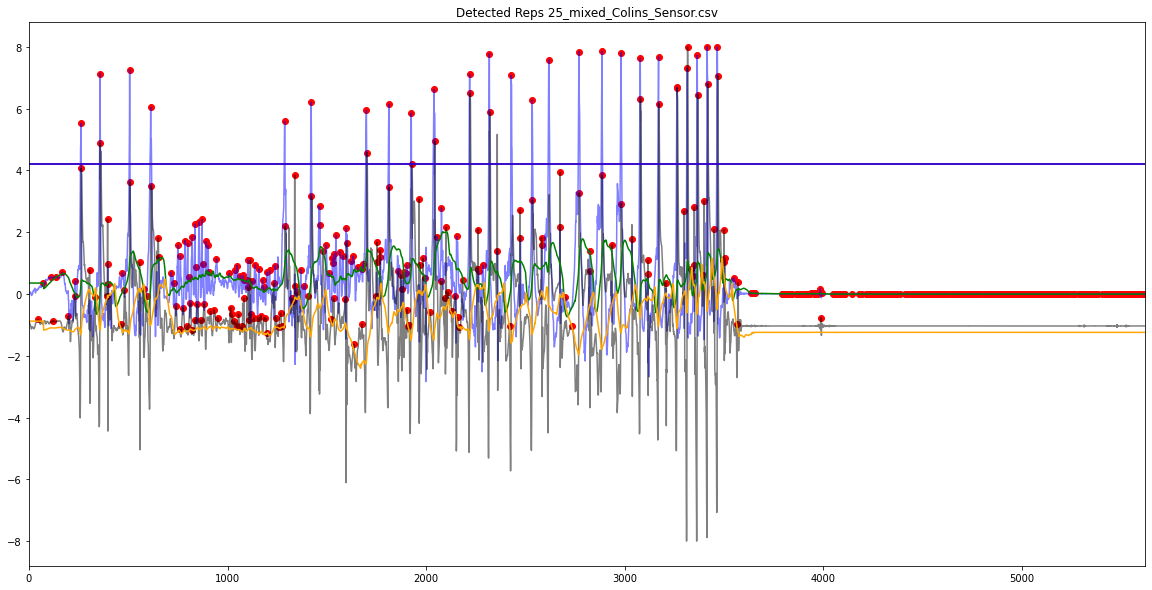

6. File Name: 25_mixed_Colins_Sensor.csv Number of Reps (x+z/z): 13 / 25 Threshold Number (x/z): 4.2 / 4.2


In [217]:
print("6. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/25_mixed_Colins_Sensor.csv',4.2,4.2,'y'))

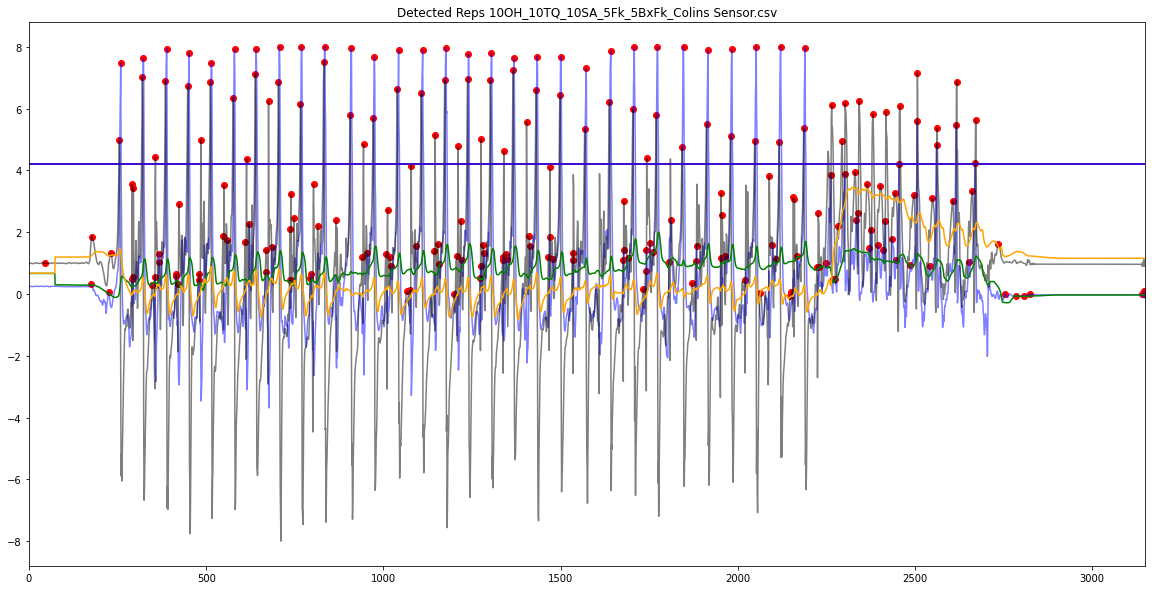

'File Name: 10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv Number of Reps: x/z 34 z 34 Threshold Number: 4.2'

In [192]:
laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv',4.2,4.2,'y')

In [1]:
print("1. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10_reps_pitch_back_Colin_Sensor.csv',4.2,4.2,'n'))
print("2. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10_short_stroke_Colins Sensor.csv',4.2,4.2,'n'))
print("3. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/10OH_10TQ_10SA_5Fk_5BxFk_Colins Sensor.csv',4.2,4.2,'n'))
print("4. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/12_short_stroke_Colins_Sensor.csv',4.2,4.2,'n'))
print("5. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/20_quick_stick_Colins_Sensor.csv',4.2,4.2,'n'))
print("6. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/25_mixed_Colins_Sensor.csv',4.2,4.2,'n'))
print("7. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/25L_25R_25Split_25Throw_split_catch_Colins_Sensor.csv',4.2,4.2,'n'))
print("8. "+laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_20/colin_update/Random_Quicksticking_Colins_Sensor.csv',4.2,4.2,'n'))

NameError: name 'laxtrakr_v1' is not defined

In [6]:
laxtrakr_v1(r'/mnt/c/Users/john.neil/Documents/Side Projects/LaxTrakr/data_6_22/Colins_Sensor_2022-06-21T16.16.39.554_DE2B712DD4B4_Accelerometer.csv',4.2,4.2,'n')

'File Name: Colins_Sensor_2022-06-21T16.16.39.554_DE2B712DD4B4_Accelerometer.csv Number of Reps (x+z/z): 356 / 363 Threshold Number (x/z): 4.2 / 4.2'